In [95]:
from IPython.display import Image
from time import sleep
from sklearn.metrics import r2_score
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


"""Onely have 1 DATASET_NAME uncommented."""
# DATASET_NAME = 'kiosk_weather_by_day.csv'
DATASET_NAME = 'cycle_weather_by_day.csv'

ts = '{:%Y%m%d%H%M%S}'.format(datetime.now())

In [96]:

from amb_sdk.sdk import DarwinSdk
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

status, msg = ds.auth_login_user('danny.diaz@utexas.edu', 'JcXCnQ7Wx2')
if not status:
    print(msg)
else:
    print('You are logged in: ',status)


You are logged in:  True


In [ ]:
# ds.get_info()
# ds.lookup_job_status()
# ds.lookup_job_status_name(job_name)
# ds.delete_job(job_name)
# ds.stop_job(job_name) 


# Data Upload
**Read dataset and view a file snippet**

In [97]:
df = pd.read_csv('./data/'+DATASET_NAME)
#print(df.dtypes)
df.head()

,Date,Month,Year,Weekday,Total Rides,TempHighF,TempAvgF,DewPointHighF,DewPointAvgF,WindHighMPH,WindAvgMPH,PrecipitationSumInches,Events,PrecipBins
0,2013-12-21,12,2013,5,103,74,60,67,49,20,4,0.460,"Rain , Thunderstorm",0-0.5
1,2013-12-22,12,2013,6,117,56,48,43,36,16,6,0.000,Sunny,0
2,2013-12-23,12,2013,0,96,58,45,31,27,8,3,0.000,Sunny,0
3,2013-12-24,12,2013,1,85,61,46,36,28,12,4,0.000,Sunny,0
4,2013-12-25,12,2013,2,145,58,50,44,40,10,2,0.005,Sunny,0-0.5


**Upload dataset to Darwin**

In [98]:
status, dataset = ds.upload_dataset('./data/'+DATASET_NAME)
print(status)
print(dataset)

if not status:
    print(dataset)

False
400: BAD REQUEST - {"message": "Dataset already exists"}

400: BAD REQUEST - {"message": "Dataset already exists"}



   # Clean Data

In [187]:
target = 'Total Rides'
status, job_id = ds.clean_data(dataset_name=DATASET_NAME, 
                               target= target)
if not status:
    print(job_id)
else:
    ds.wait_for_job(job_id['job_name'])
    print('\nData has been successfully cleaned!')

{'status': 'Requested', 'starttime': '2019-04-18T20:29:06.87694', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': ['e5a45329a0454f3dadfadc061ad0d8e0'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-18T20:29:06.87694', 'endtime': '2019-04-18T20:29:09.318478', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': ['e5a45329a0454f3dadfadc061ad0d8e0'], 'model_name': None, 'job_error': ''}

Data has been successfully cleaned!


# Create and Train Model

We will now build a model that will learn the class labels in the target column.<br> In the default boston dataset, the target column is "Assessed_Value". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.




In [197]:
model = target + "_model0" + ts
status, job_id = ds.create_model(dataset_names = DATASET_NAME, \
                                 model_name =  model, \
                                 max_train_time = '00:03')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-18T20:36:51.459048', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': None, 'model_name': 'Total Rides_model020190418192057', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-18T20:36:51.459048', 'endtime': None, 'percent_complete': 3, 'job_type': 'TrainModel', 'loss': 0.4420505464076996, 'generations': 4, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': None, 'model_name': 'Total Rides_model020190418192057', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-18T20:36:51.459048', 'endtime': None, 'percent_complete': 3, 'job_type': 'TrainModel', 'loss': 0.4420505464076996, 'generations': 4, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': None, 'model_name': 'Total Rides_model020190418192057', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-18T20:36:51.459048', 'end

# Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [198]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-18T20:40:09.019931', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.3818041980266571, 'generations': 4, 'dataset_names': None, 'artifact_names': ['7a29aebf98a843f0a07d1a37cb7631a5'], 'model_name': 'Total Rides_model020190418192057', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-18T20:40:09.019931', 'endtime': '2019-04-18T20:40:10.858006', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.3818041980266571, 'generations': 4, 'dataset_names': None, 'artifact_names': ['7a29aebf98a843f0a07d1a37cb7631a5'], 'model_name': 'Total Rides_model020190418192057', 'job_error': ''}


Show the 10 most important features of the model.

In [199]:
feature_importance[:10]

TempHighF                 0.154794
Month = 3                 0.154432
Weekday = 5               0.123267
TempAvgF                  0.077450
Month = 10                0.059096
Weekday = 6               0.058667
WindHighMPH               0.054971
DewPointAvgF              0.052330
PrecipitationSumInches    0.031851
DewPointHighF             0.028359
dtype: float64

# Predictions
**Perform model prediction on the the training dataset.**

In [200]:
status, artifact = ds.run_model(DATASET_NAME, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Complete', 'starttime': '2019-04-18T20:40:27.283213', 'endtime': '2019-04-18T20:40:28.375077', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.3818041980266571, 'generations': 4, 'dataset_names': ['cycle_weather_by_day.csv'], 'artifact_names': ['3e7e4efdbc244c6689a01b4d5fb7c11d'], 'model_name': 'Total Rides_model020190418192057', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [201]:
status, prediction = ds.download_artifact(artifact['artifact_name'])

Create plots comparing predictions with actual target

R^2 :  0.7415863522668167


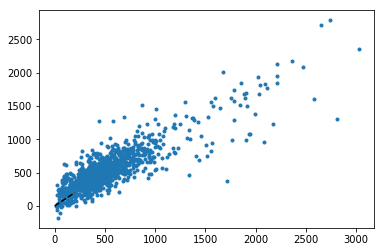

In [202]:
#Plot predictions vs actual
plt.plot(df[target], prediction[target], '.')
plt.plot([0,200],[0,200],'--k')
print('R^2 : ', r2_score(df[target], prediction[target]))

In [203]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'TemporalConvolutionalNet', 'parameters': {'numfilters': 10, 'kernelsize': 5, 'depth': 8, 'numunits': 70, 'seqlength': 256, 'dropout': 0.0}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 1}}}]


In [204]:
ds.delete_model(model)

(True, None)

In [205]:
#ds.lookup_job_status_name(analyze_id['job_name'])